In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns

In [170]:
opportunities = pd.read_csv("Entrenamieto_ECI_2020.csv")

# Voy a ver la cantidad de veces que aparece cada Source

In [193]:
opportunities.drop_duplicates(subset="Opportunity_ID", inplace=True) #Hago esto porque algunas oportunidades tienen mas de una entrada
sources = opportunities.groupby("Source").agg({"Opportunity_ID":"count"}).sort_values(by="Opportunity_ID").reset_index() #Cuantas veces aparece cada source
sources["Source"] = sources["Source"].apply(lambda x: x.replace("Source_","")) #Saco Source_ de los nombres porque rompe los ejes
sources.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
sources

,Source,Cantidad
0,5,1
1,12,2
2,0,4
3,6,17
4,4,32
5,2,68
6,1,88
7,10,89
8,3,305
9,13,536


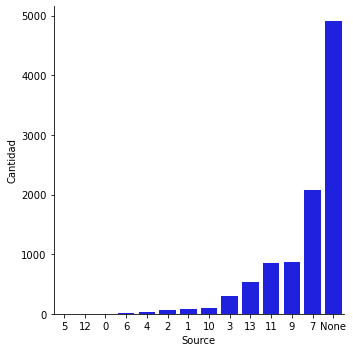

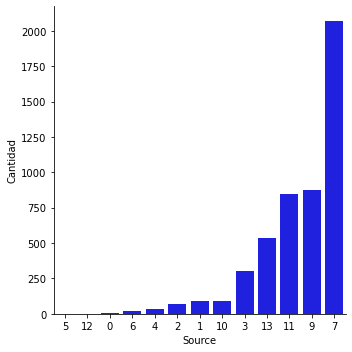

In [194]:
sns.catplot(y="Cantidad", x="Source",data=sources,kind="bar",color="blue") #Cuantas veces aparece cada fuente
sources.drop(axis=0, labels=13, inplace=True)
sns.catplot(y="Cantidad", x="Source",data=sources,kind="bar",color="blue",order=sources["Source"]) #Cuantas veces aparece cada fuente sin contar None

# Voy a ver como finaliza cada Source

In [386]:
sourcesVsWon = opportunities.pivot_table(columns="Stage",index="Source",values="Opportunity_ID", aggfunc="count").fillna(0)
sourcesVsWon["Total"] = opportunities["Source"].value_counts()
sourcesVsWon = sourcesVsWon.reset_index()
sourcesVsWon["Source"] = sourcesVsWon["Source"].apply(lambda x: x.replace("Source_",""))
sourcesVsWon["Closed Won"] = sourcesVsWon["Closed Won"]/sourcesVsStage["Total"]
sourcesVsWon = sourcesVsWon.sort_values(by="Closed Won")
sourcesVsWon

Stage,Source,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Total
1,0,4.0,0.000000,0.0,0.0,0.0,4
5,12,2.0,0.000000,0.0,0.0,0.0,2
10,5,1.0,0.000000,0.0,0.0,0.0,1
11,6,12.0,0.294118,0.0,0.0,0.0,17
2,1,60.0,0.318182,0.0,0.0,0.0,88
3,10,58.0,0.348315,0.0,0.0,0.0,89
7,2,42.0,0.382353,0.0,0.0,0.0,68
12,7,1155.0,0.438859,2.0,3.0,1.0,2069
9,4,16.0,0.500000,0.0,0.0,0.0,32
0,None,2371.0,0.509776,7.0,21.0,8.0,4910


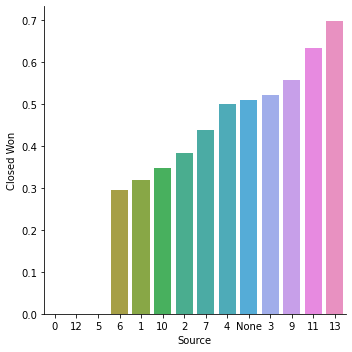

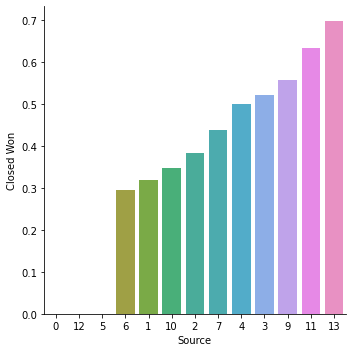

In [387]:
sns.catplot(x="Source", y="Closed Won",kind="bar", data=sourcesVsWon)
sourcesVsWonWithoutNone = sourcesVsWon.drop(axis=0, labels=0) #Saco los None
sns.catplot(x="Source", y="Closed Won",kind="bar", data=sourcesVsWonWithoutNone,order=sourcesVsWonWithoutNone["Source"])

# Filtro los que tienen menos de 100 entradas

In [388]:
sourcesVsWonFiltered = sourcesVsWon[sourcesVsWon["Total"]>100]
sourcesVsWonFiltered

Stage,Source,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Total
12,7,1155.0,0.438859,2.0,3.0,1.0,2069
0,None,2371.0,0.509776,7.0,21.0,8.0,4910
8,3,143.0,0.521311,0.0,3.0,0.0,305
13,9,385.0,0.556701,0.0,2.0,0.0,873
4,11,311.0,0.632822,0.0,0.0,0.0,847
6,13,159.0,0.697761,2.0,1.0,0.0,536


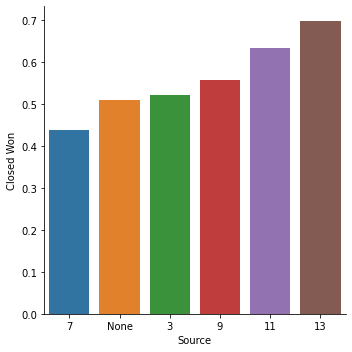

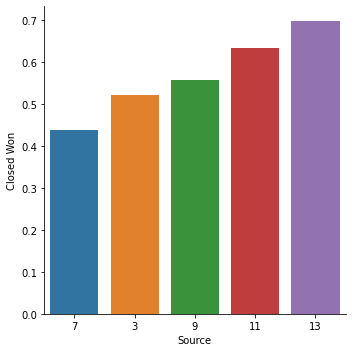

In [389]:
sns.catplot(x="Source", y="Closed Won",kind="bar", data=sourcesVsWonFiltered)
sourcesVsWonFilteredWithoutNone = sourcesVsWonFiltered.drop(axis=0, labels=0) #Saco los None
sns.catplot(x="Source", y="Closed Won",kind="bar", data=sourcesVsWonFilteredWithoutNone,order=sourcesVsWonFilteredWithoutNone["Source"])

#VER EL TEMA DE LOS COLORES

In [398]:
sourcesVsStage = opportunities.groupby(["Source","Stage"]).agg({"Opportunity_ID":"count"})
sourcesVsStage = sourcesVsStage.reset_index()
sourcesVsStage["Source"] = sourcesVsStage["Source"].apply(lambda x: x.replace("Source_",""))
sourcesVsStage.rename(columns={"Opportunity_ID":"Cantidad"},inplace = True)
sourcesVsStage = sourcesVsStage[sourcesVsStage["Cantidad"]>100]
sourcesVsStage

,Source,Stage,Cantidad
0,None,Closed Lost,2371
1,None,Closed Won,2503
10,11,Closed Lost,311
11,11,Closed Won,536
13,13,Closed Lost,159
14,13,Closed Won,374
19,3,Closed Lost,143
20,3,Closed Won,159
27,7,Closed Lost,1155
28,7,Closed Won,908


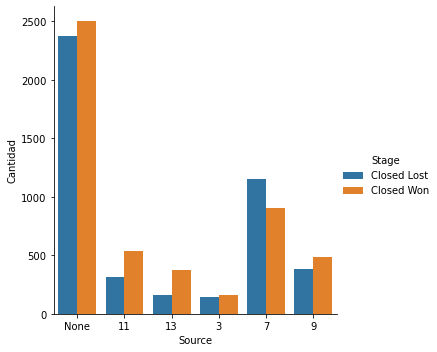

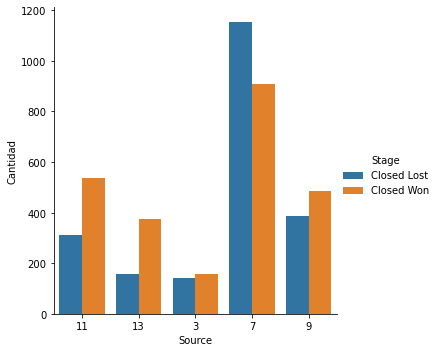

In [400]:
sns.catplot(x="Source",y="Cantidad",hue="Stage",data=sourcesVsStage,kind="bar")
sourcesVsStage.drop(axis=0,labels=[0,1],inplace=True)
sns.catplot(x="Source",y="Cantidad",hue="Stage",data=sourcesVsStage,kind="bar")